<a href="https://colab.research.google.com/github/bathaeian/oil_wag/blob/main/oil_wag_av.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/oil_wag/av.xlsx')
print(df1)


     lab1  lab2    d0        d4        d8       d12
0     wal   200  0.15  0.330000  0.780000  1.200000
1     wal   400  0.15  0.230000  0.640000  0.990000
2     wal   800  0.18  0.210000  0.540000  0.740000
3   grape   200  0.15  0.530000  0.880000  1.500000
4   grape   400  0.15  0.330000  0.640000  1.200000
5   grape   800  0.18  0.210000  0.540000  0.940000
6     alm   200  0.15  0.430000  0.780000  1.200000
7     alm   400  0.15  0.210000  0.440000  0.890000
8     alm   800  0.18  0.200000  0.340000  0.640000
9    none     0  0.20  0.700000  1.633333  2.000000
10  ttbhq  1000  0.14  0.373333  0.813333  1.186667


In [3]:
df2= df1[['d0','d4','d8','d12']]
print(df2)
print(df2.describe())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

      d0        d4        d8       d12
0   0.15  0.330000  0.780000  1.200000
1   0.15  0.230000  0.640000  0.990000
2   0.18  0.210000  0.540000  0.740000
3   0.15  0.530000  0.880000  1.500000
4   0.15  0.330000  0.640000  1.200000
5   0.18  0.210000  0.540000  0.940000
6   0.15  0.430000  0.780000  1.200000
7   0.15  0.210000  0.440000  0.890000
8   0.18  0.200000  0.340000  0.640000
9   0.20  0.700000  1.633333  2.000000
10  0.14  0.373333  0.813333  1.186667
              d0         d4         d8        d12
count  11.000000  11.000000  11.000000  11.000000
mean    0.161818   0.341212   0.729697   1.135152
std     0.019400   0.160466   0.342791   0.376420
min     0.140000   0.200000   0.340000   0.640000
25%     0.150000   0.210000   0.540000   0.915000
50%     0.150000   0.330000   0.640000   1.186667
75%     0.180000   0.401667   0.796666   1.200000
max     0.200000   0.700000   1.633333   2.000000


,0,1,2,3
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,5.046468e-16,-5.197862e-16,-4.541821e-17,-3.608225e-16
std,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00
min,-1.179536e+00,-9.229621e-01,-1.192324e+00,-1.379628e+00
25%,-6.389151e-01,-8.576021e-01,-5.804004e-01,-6.134025e-01
50%,-6.389151e-01,-7.328222e-02,-2.744384e-01,1.435362e-01
75%,9.829464e-01,3.951300e-01,2.049015e-01,1.806856e-01
max,2.064187e+00,2.345038e+00,2.764783e+00,2.409705e+00


In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[1 0 0 1 1 0 1 0 0 2 1]
[[ 0.33420177 -0.84453015 -0.70278519 -0.82237303]
 [-0.74703924  0.37552264  0.14982863  0.3404321 ]
 [ 2.06418739  2.34503756  2.7647828   2.40970462]]


/tmp/ipython-input-5-2796997653.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


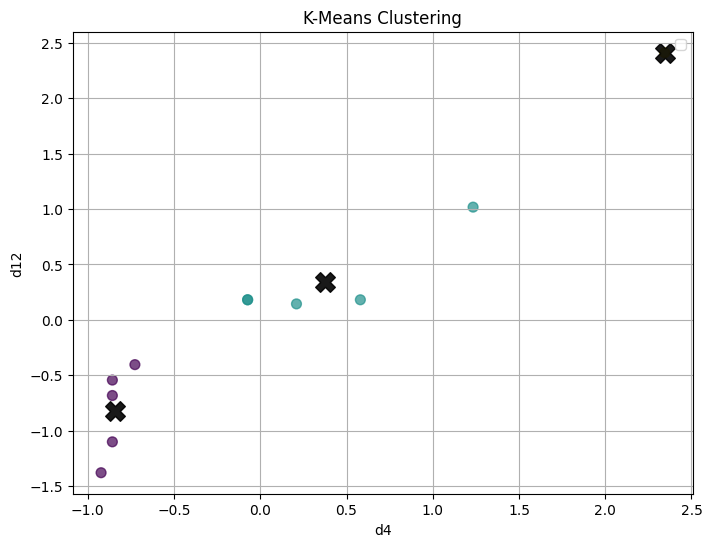

In [5]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(data_scaled)
fh,fv=1,3
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, fh], data_scaled[:, fv], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, fh], centers[:, fv], c='black', s=200, alpha=0.9, marker='X')

plt.title('K-Means Clustering')
plt.xlabel(f'd{fh*4}')
plt.ylabel(f'd{fv*4}')
plt.legend()
plt.grid(True)
plt.show()
